In [1]:
pip install pandas numpy matplotlib seaborn jupyterlab scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('nba_data_processed.csv')

# Drop rows with any missing values
df.dropna(inplace=True)

print(df.head())


             Player Pos   Age   Tm     G    GS    MP   FG   FGA    FG%  ...  \
0  Precious Achiuwa   C  23.0  TOR  55.0  12.0  20.7  3.6   7.3  0.485  ...   
1      Steven Adams   C  29.0  MEM  42.0  42.0  27.0  3.7   6.3  0.597  ...   
2       Bam Adebayo   C  25.0  MIA  75.0  75.0  34.6  8.0  14.9  0.540  ...   
3      Ochai Agbaji  SG  22.0  UTA  59.0  22.0  20.5  2.8   6.5  0.427  ...   
4      Santi Aldama  PF  22.0  MEM  77.0  20.0  21.8  3.2   6.8  0.470  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.702  1.8  4.1   6.0  0.9  0.6  0.5  1.1  1.9   9.2  
1  0.364  5.1  6.5  11.5  2.3  0.9  1.1  1.9  2.3   8.6  
2  0.806  2.5  6.7   9.2  3.2  1.2  0.8  2.5  2.8  20.4  
3  0.812  0.7  1.3   2.1  1.1  0.3  0.3  0.7  1.7   7.9  
4  0.750  1.1  3.7   4.8  1.3  0.6  0.6  0.8  1.9   9.0  

[5 rows x 29 columns]


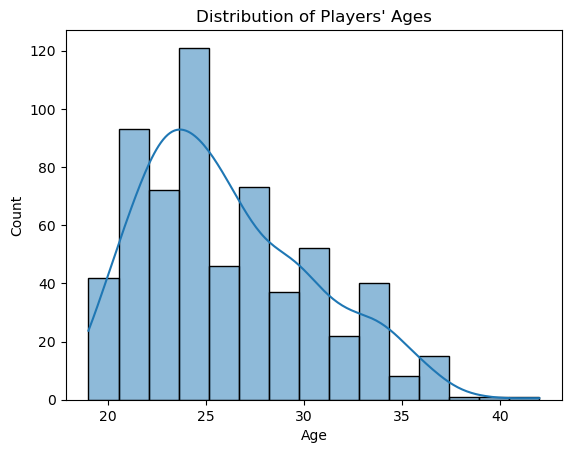

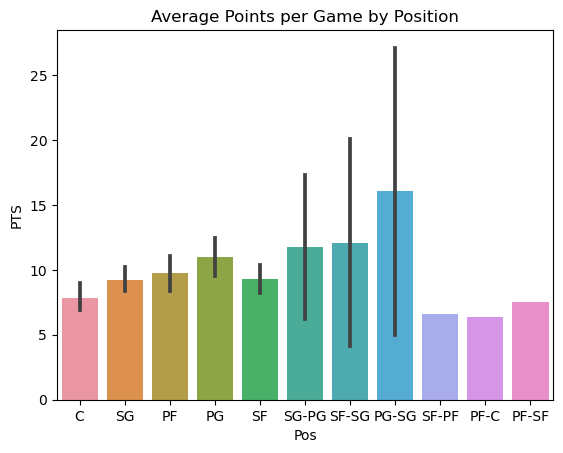

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of player ages
sns.histplot(df['Age'], kde=True, bins=15)
plt.title("Distribution of Players' Ages")
plt.show()

# Average points per game by position
sns.barplot(x='Pos', y='PTS', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Points per Game by Position')
plt.show()


In [19]:
# Print all column names to verify
print(df.columns)


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Cluster'],
      dtype='object')


In [25]:
import pandas as pd

# Assuming you have loaded your DataFrame as df
correlation_matrix = df.corr()

# Display correlations with the target variable
target_correlations = correlation_matrix['PTS'].sort_values(ascending=False)
print(target_correlations)


PTS        1.000000
FG         0.991516
FGA        0.981417
2PA        0.922206
2P         0.907880
FT         0.900120
FTA        0.889785
MP         0.875483
TOV        0.846614
GS         0.716764
AST        0.714276
3PA        0.705424
3P         0.692844
DRB        0.691585
TRB        0.609485
STL        0.576345
PF         0.566428
G          0.426033
BLK        0.326367
ORB        0.271392
FT%        0.240865
FG%        0.177550
eFG%       0.173693
3P%        0.152609
2P%        0.088418
Age        0.082769
Cluster   -0.201584
Name: PTS, dtype: float64


/var/folders/xs/xpsjvxwd1dn71l6wcvr0hb8c0000gn/T/ipykernel_17757/1481009453.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [26]:

selected_features = [
    'MP', '2PA', '2P', '3PA', '3P', 'FT', 'FTA', 'TOV',
    'AST', 'DRB', 'TRB', 'STL', 'PF', 'G', 'BLK', 'ORB',
    'FT%', '3P%', 'FG%', 'eFG%', '2P%', 'Age'
]

# Define the feature set and target
X = df[selected_features]
y = df['PTS']


In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")


Test MSE: 1.0662298320000003


In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# The mean score and the 95% confidence interval of the score estimate
print(f"Cross-validated MSE: {-cv_scores.mean()} (+/- {cv_scores.std() * 2})")


Cross-validated MSE: 1.223255726444445 (+/- 0.42343163069872014)


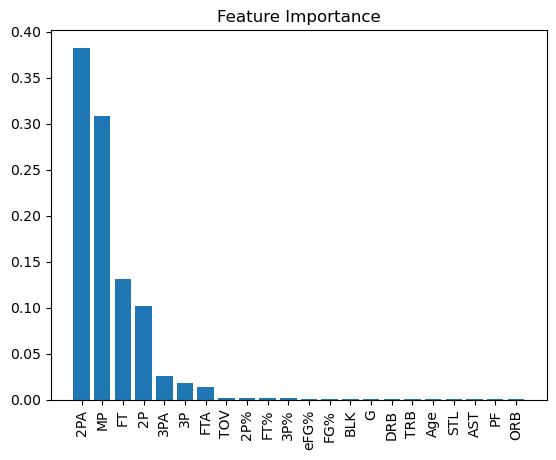

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [selected_features[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


In [32]:
# Create a DataFrame to make interpretation easier
feature_importances_df = pd.DataFrame({'Feature': names, 'Importance': importances[indices]})

# Print the DataFrame sorted by importance
print(feature_importances_df.sort_values(by='Importance', ascending=False))


   Feature  Importance
0      2PA    0.382443
1       MP    0.308286
2       FT    0.130990
3       2P    0.102430
4      3PA    0.025671
5       3P    0.017899
6      FTA    0.014393
7      TOV    0.002039
8      2P%    0.001841
9      FT%    0.001761
10     3P%    0.001703
11    eFG%    0.001311
12     FG%    0.001141
13     BLK    0.001087
14       G    0.001083
15     DRB    0.001016
16     TRB    0.000967
17     Age    0.000928
18     STL    0.000856
19     AST    0.000841
20      PF    0.000817
21     ORB    0.000497


In [33]:

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting Test MSE: {gb_mse}")


Gradient Boosting Test MSE: 0.8215537195135408


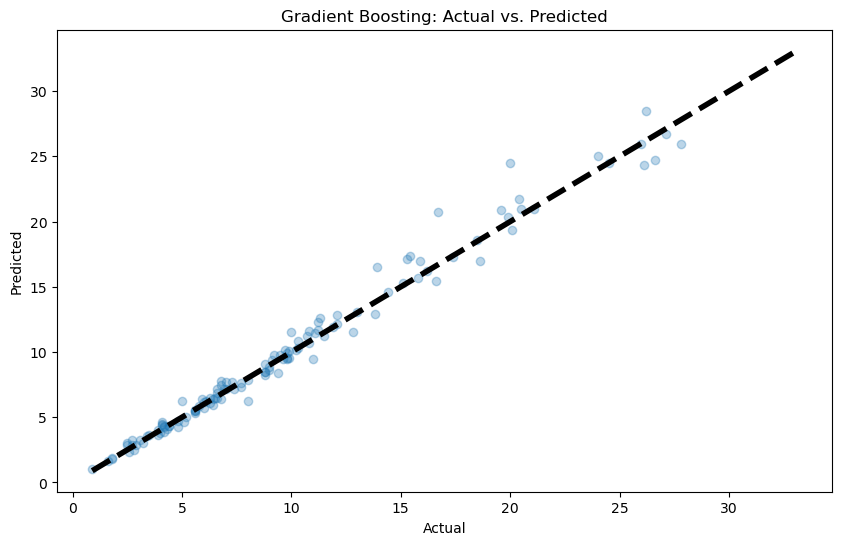

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_predictions, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.show()


In [36]:
cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE for Gradient Boosting: {-cv_scores_gb.mean()} (+/- {cv_scores_gb.std() * 2})")


Cross-validated MSE for Gradient Boosting: 0.7168387311850218 (+/- 0.30302884820718984)


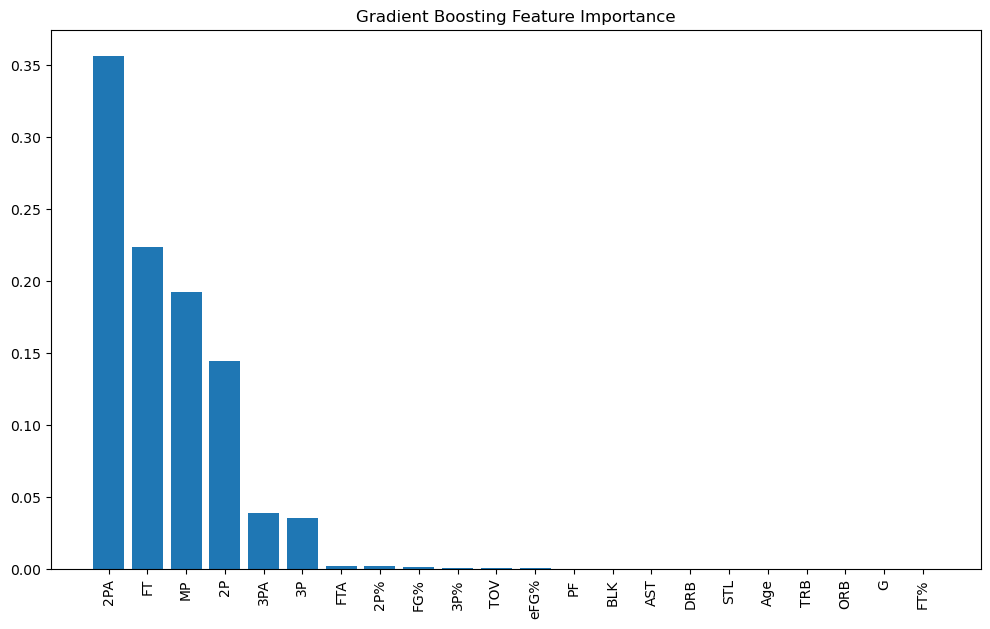

In [37]:
# feature importances for Gradient Boosting
gb_importances = gb_model.feature_importances_

# Sort the feature importances in descending order and plot
indices_gb = np.argsort(gb_importances)[::-1]
plt.figure(figsize=(12, 7))
plt.title('Gradient Boosting Feature Importance')
plt.bar(range(X_train.shape[1]), gb_importances[indices_gb], align='center')
plt.xticks(range(X_train.shape[1]), [selected_features[i] for i in indices_gb], rotation=90)
plt.show()


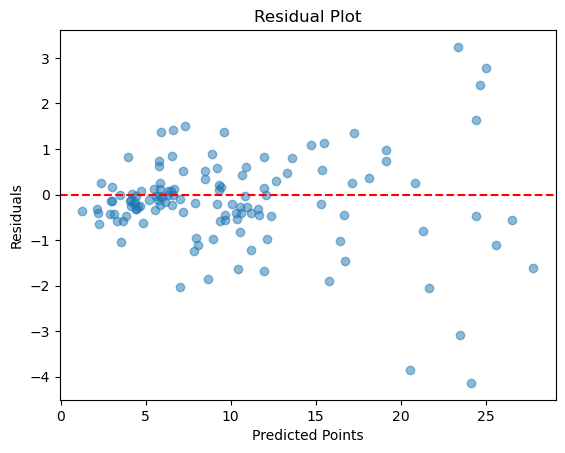

In [38]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


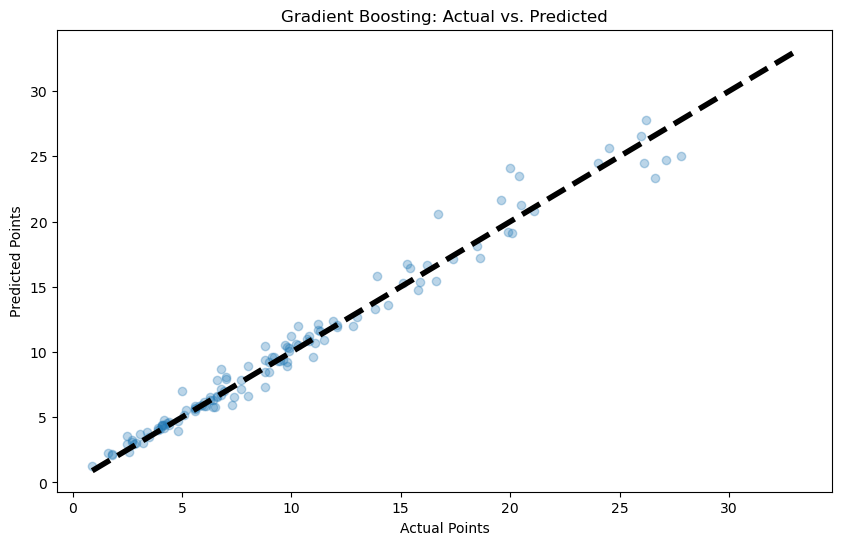

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Perfect prediction line
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.show()


In [44]:

df.to_csv('nba_player_stats_for_tableau.csv', index=False)


In [45]:

download_link = 'nba_player_stats_for_tableau.csv'
download_link


'nba_player_stats_for_tableau.csv'